In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
#Read data

train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

train.shape

(1460, 80)

180921.19589041095

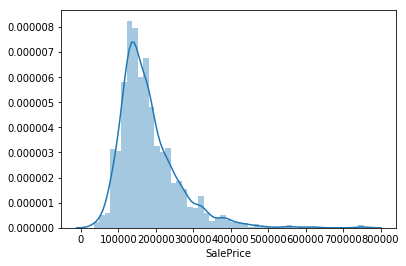

In [5]:
sns.distplot(train.SalePrice);
np.mean(train.SalePrice)

In [6]:
skew = train.skew()
kurt = train.kurt() 
corr = train.corr()['SalePrice']
cols = ['skew', 'kurt', 'corr']
details = pd.concat([skew, kurt, corr], axis = 1, sort=False)
details.columns = cols
details[details['corr'] >= 0.2].sort_values(['corr', 'kurt'], ascending = False)


,skew,kurt,corr
SalePrice,1.882876,6.536282,1.000000
OverallQual,0.216944,0.096293,0.790982
GrLivArea,1.366560,4.895121,0.708624
GarageCars,-0.342549,0.220998,0.640409
GarageArea,0.179981,0.917067,0.623431
TotalBsmtSF,1.524255,13.250483,0.613581
1stFlrSF,1.376757,5.745841,0.605852
FullBath,0.036562,-0.857043,0.560664
TotRmsAbvGrd,0.676341,0.880762,0.533723
YearBuilt,-0.613461,-0.439552,0.522897


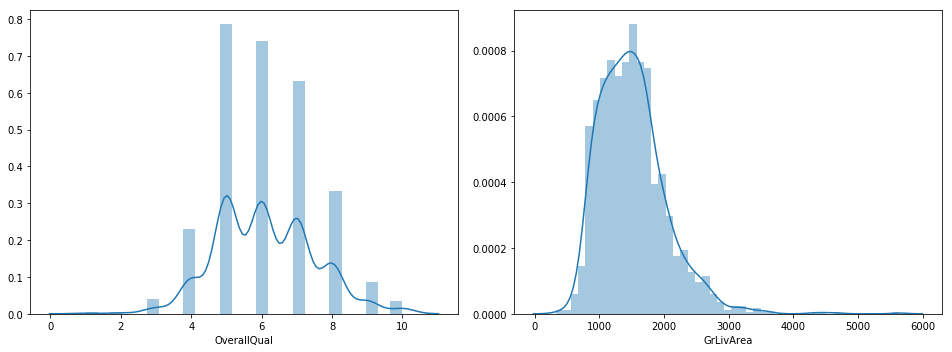

In [7]:
fig = plt.figure(figsize=(20, 5))

fig1 = fig.add_subplot(131); 
sns.distplot(train.OverallQual);

fig2 = fig.add_subplot(132); 
sns.distplot(train.GrLivArea);

plt.tight_layout(); 
plt.show()

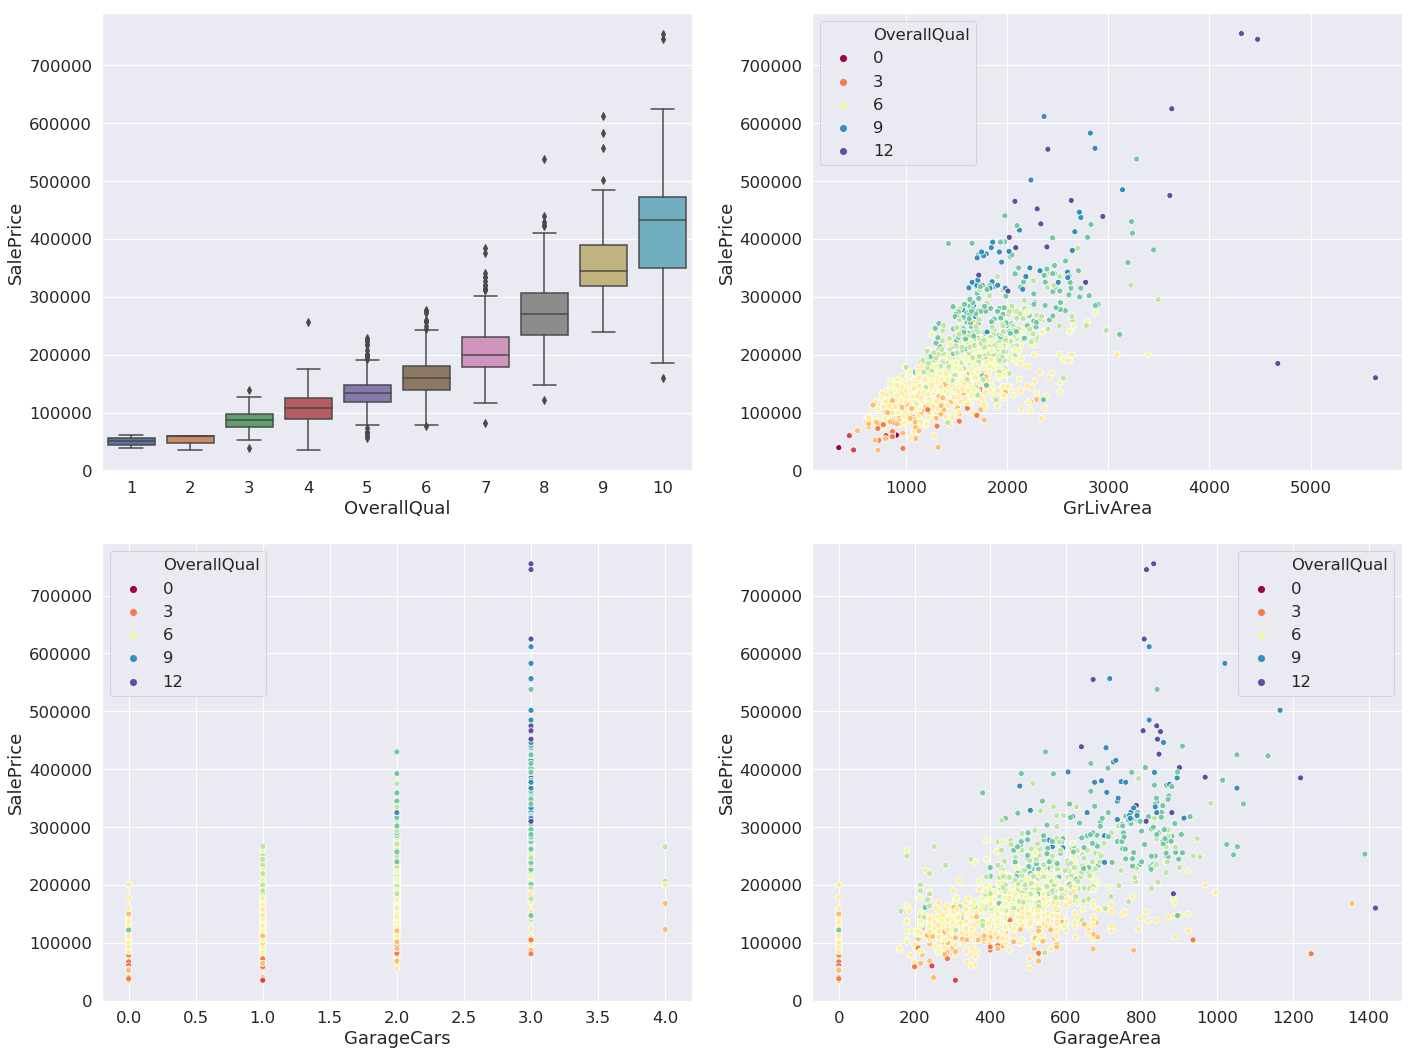

In [8]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

plt.tight_layout(); 
plt.show()

In [9]:
train_sub = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)
corr = train_sub.corr()['SalePrice'].sort_values(ascending = False)
corr.head()

SalePrice      1.000000
OverallQual    0.795774
GrLivArea      0.734968
TotalBsmtSF    0.651153
GarageCars     0.641047
Name: SalePrice, dtype: float64

In [10]:
temp = train_sub[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
temp['GrLivAreaByRms'] = temp.GrLivArea/temp.TotRmsAbvGrd
temp['GrLivArea_x_Rms'] = temp.GrLivArea*temp.TotRmsAbvGrd

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


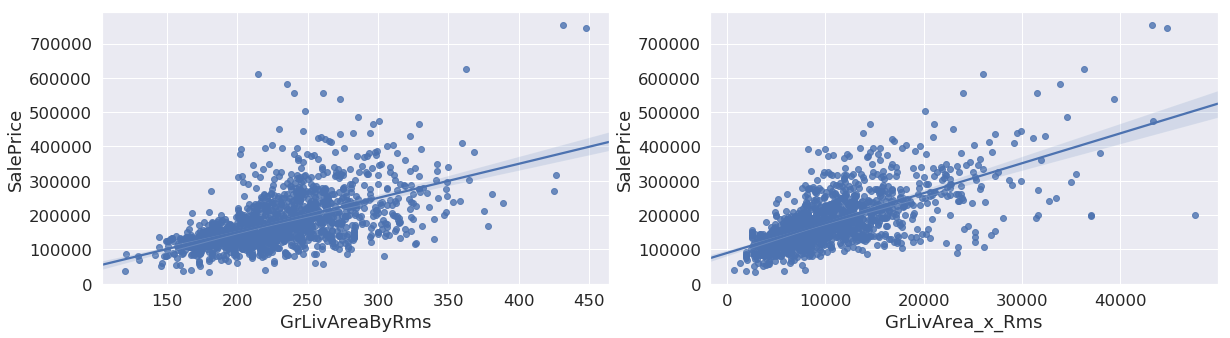

In [11]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); 
sns.regplot(x='GrLivAreaByRms', y='SalePrice', data=temp)

fig2 = fig.add_subplot(122); 
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=temp)
# plt.legend(['Outliers'])
plt.show()

In [12]:
max(temp['GrLivArea_x_Rms'])
train_sub = train_sub[train_sub.GrLivArea * train_sub.TotRmsAbvGrd < 45000]

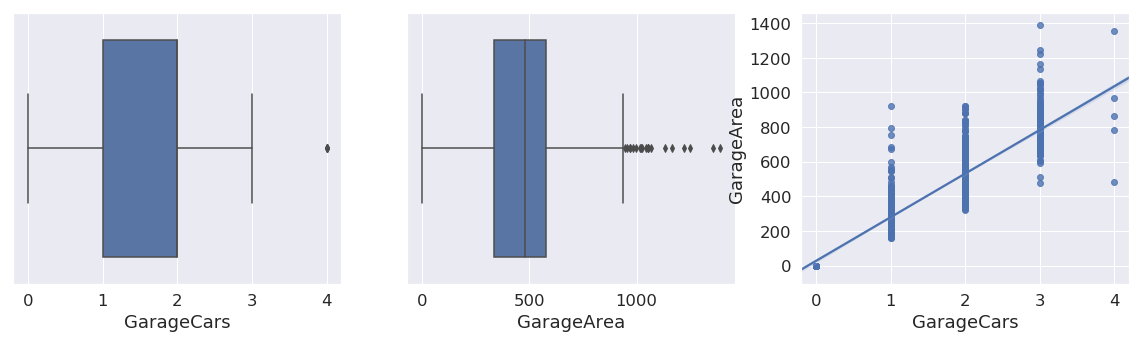

In [13]:
fig = plt.figure(figsize=(20,5))

fig1 = fig.add_subplot(131); 
sns.boxplot(train_sub.GarageCars)

fig2 = fig.add_subplot(132); 
sns.boxplot(train_sub.GarageArea)

fig3 = fig.add_subplot(133); 
sns.regplot(x='GarageCars', y='GarageArea', data=train_sub)
# sns.boxplot(train_sub.GarageCars, train_sub.GarageArea)

plt.show()

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


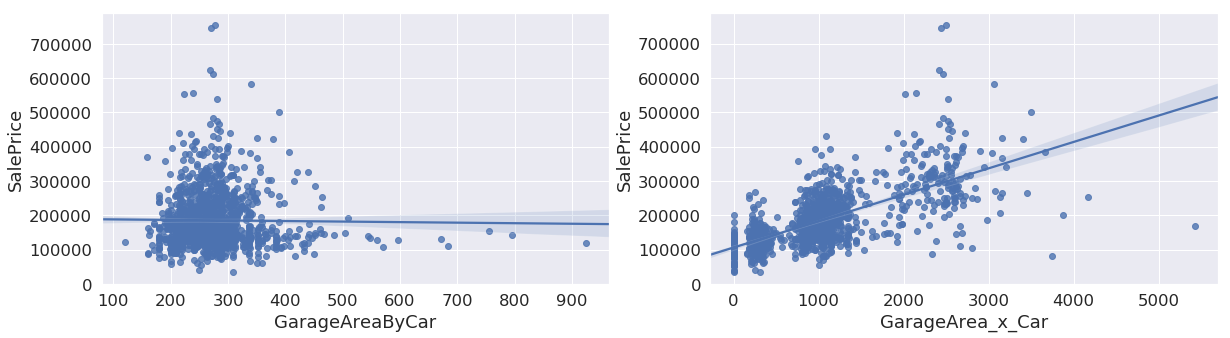

In [14]:
temp = train_sub[['SalePrice', 'GarageArea', 'GarageCars']]
temp['GarageAreaByCar'] = temp.GarageArea/temp.GarageCars
temp['GarageArea_x_Car'] = temp.GarageArea*temp.GarageCars

fig = plt.figure(figsize=(20,5))

fig1 = fig.add_subplot(121); 
sns.regplot(x='GarageAreaByCar', y='SalePrice', data=temp)

fig2 = fig.add_subplot(122); 
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=temp); 

plt.show()

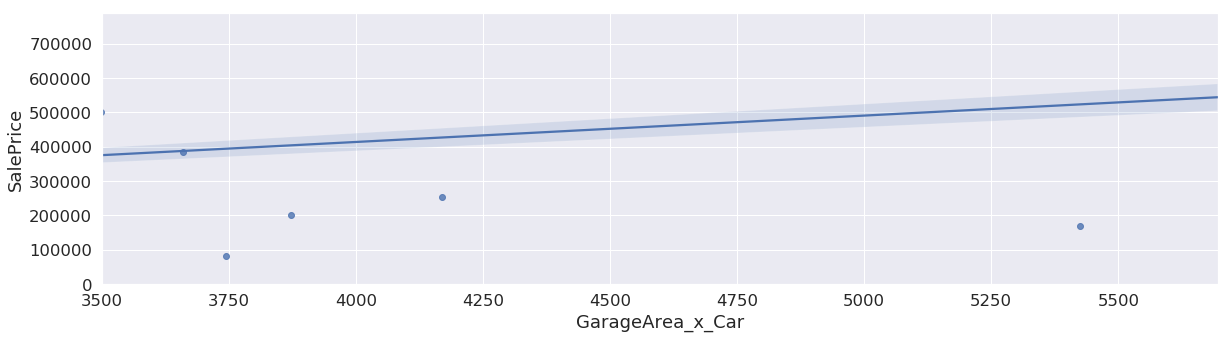

In [15]:
fig = plt.figure(figsize=(20,5))
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=temp); 
plt.xlim(3500,)
plt.show()

In [16]:
train_sub = train_sub.loc[temp.GarageArea_x_Car<3700]

In [56]:
#set features and target

x_train1 = train_sub.iloc[:, :-1]
y_train = train_sub.iloc[:, -1]

#Define continuous and categorical variables

cont =['LotFrontage', 'LotArea', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

cat = list(set(x_train1.columns) - set(cont))

#make sure categorical vars are strings
# x_train1[cat] = x_train1[cat].astype(str)


In [57]:
for i in cat:
    print(x_train1[i].value_counts().sort_index())

Ex    736
Fa     49
Gd    241
Po      1
TA    426
Name: HeatingQC, dtype: int64
1       2
2       3
3      19
4     115
5     396
6     373
7     319
8     167
9      43
10     16
Name: OverallQual, dtype: int64
Ex       3
Fa      28
Gd     145
Po       1
TA    1276
Name: ExterCond, dtype: int64
Flat         13
Gable      1138
Gambrel      11
Hip         282
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     59
HdBoard    207
ImStucc     10
MetalSd    211
Other        1
Plywood    142
Stone        5
Stucco      25
VinylSd    502
Wd Sdng    197
Wd Shng     38
Name: Exterior2nd, dtype: int64
2006    314
2007    326
2008    302
2009    336
2010    175
Name: YrSold, dtype: int64
Ex       2
Fa      35
Gd       9
Po       7
TA    1320
Name: GarageCond, dtype: int64
1.5Fin    154
1.5Unf     14
1Story    723
2.5Fin      7
2.5Unf     11
2Story    442
SFoyer     37
SLvl       65
Name: HouseStyle, dt

In [65]:
#impute
fill = pd.Series([x_train1[c].value_counts().index[0]
            if c in cat else x_train1[c].mean() for c in x_train1],
            index=x_train1.columns)

x_train1 = x_train1.fillna(fill)

MSSubClass      [[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80...
MSZoning                              [[RL, RM, C (all), FV, RH]]
LotFrontage     [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69...
LotArea         [[8450, 9600, 11250, 9550, 14260, 14115, 10084...
Street                                             [[Pave, Grvl]]
Alley                                              [[Grvl, Pave]]
LotShape                                   [[Reg, IR1, IR2, IR3]]
LandContour                                [[Lvl, Bnk, Low, HLS]]
Utilities                                      [[AllPub, NoSeWa]]
LotConfig                   [[Inside, FR2, Corner, CulDSac, FR3]]
LandSlope                                       [[Gtl, Mod, Sev]]
Neighborhood    [[CollgCr, Veenker, Crawfor, NoRidge, Mitchel,...
Condition1      [[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn,...
Condition2      [[Norm, Artery, RRNn, Feedr, PosA, PosN, RRAn,...
BldgType                  [[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]]
HouseStyle